# Lazy Tensorflow 2 Ann Classification - MNIST Dataset

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import time
import itertools

from sklearn.metrics import confusion_matrix

start_time = time.time()

print(tf.__version__)

2.18.0


## Load Data

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


## Build Model

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

## Compile the Model

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Train the Model

In [10]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8633 - loss: 0.4773 - val_accuracy: 0.9578 - val_loss: 0.1449
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9541 - loss: 0.1559 - val_accuracy: 0.9707 - val_loss: 0.0981
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9681 - loss: 0.1075 - val_accuracy: 0.9716 - val_loss: 0.0909
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9728 - loss: 0.0914 - val_accuracy: 0.9749 - val_loss: 0.0847
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9780 - loss: 0.0708 - val_accuracy: 0.9757 - val_loss: 0.0784
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9801 - loss: 0.0627 - val_accuracy: 0.9774 - val_loss: 0.0773
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9814 - loss: 0.0573 - val_accuracy: 0.9787 - val_loss: 0.0667
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9840 - loss: 0.0523 - 

## Model Evaluation 

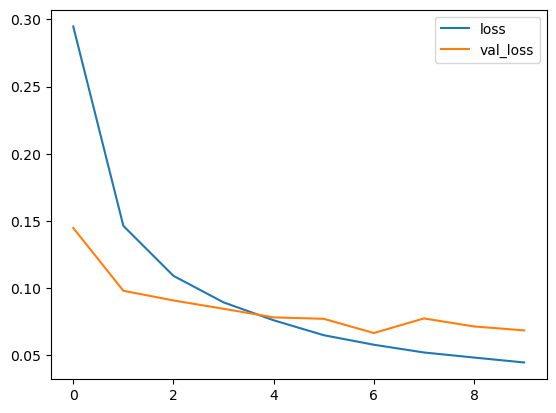

In [12]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

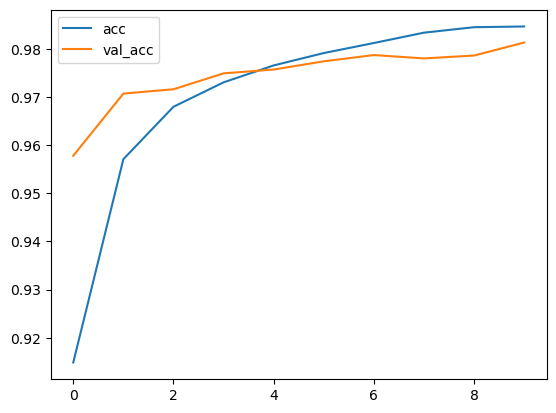

In [13]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

In [14]:
print(model.evaluate(x_test, y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.9773 - loss: 0.0846
[0.06868347525596619, 0.9812999963760376]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step
Confusion matrix, without normalization
[[ 971    1    1    1    1    1    1    0    2    1]
 [   0 1128    3    0    0    1    2    0    1    0]
 [   2    0 1014    1    2    0    2    8    2    1]
 [   0    0    3  990    0    5    0    4    3    5]
 [   0    0    1    0  960    0    5    1    1   14]
 [   2    1    0    6    2  872    3    1    4    1]
 [   4    3    1    1    2    6  940    0    1    0]
 [   2    4    9    3    0    0    0 1001    0    9]
 [   0    0    3    5    8    4    1    4  945    4]
 [   1    3    0    3    4    1    0    4    1  992]]


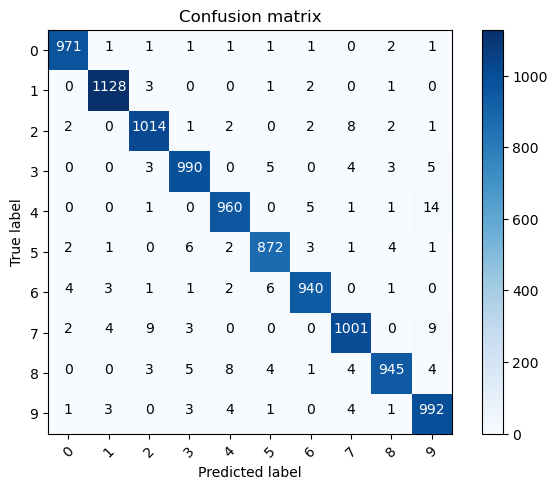

In [31]:
# Plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

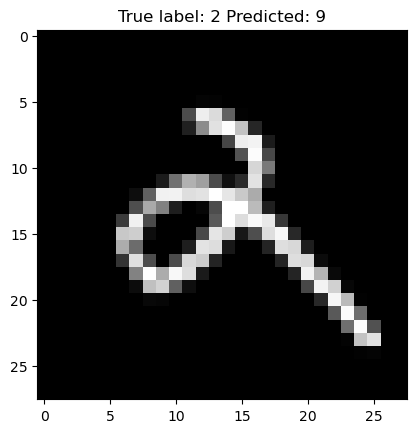

In [55]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

In [15]:
end_time = time.time()
total_time = end_time - start_time
print(f"The total time: {total_time}") 

The total time: 31.557247161865234
